# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

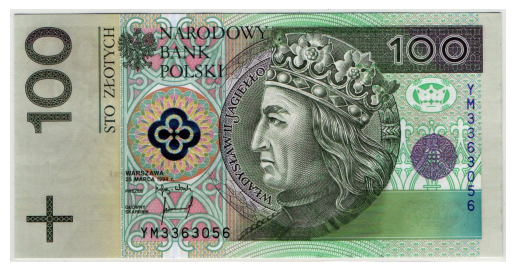

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)
img = cv2.imread(fileName)
plt.imshow(img)
plt.axis('off')
plt.show()

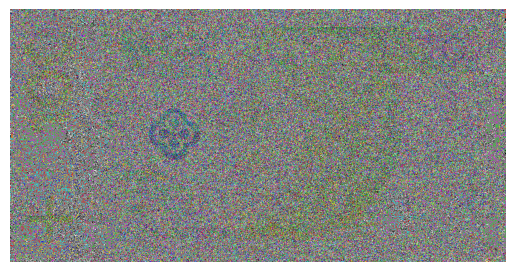

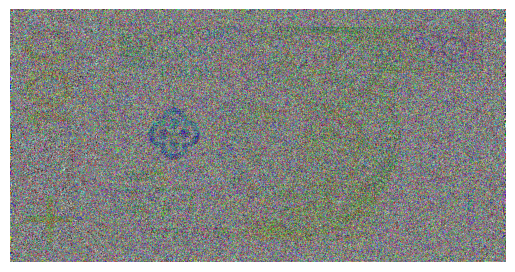

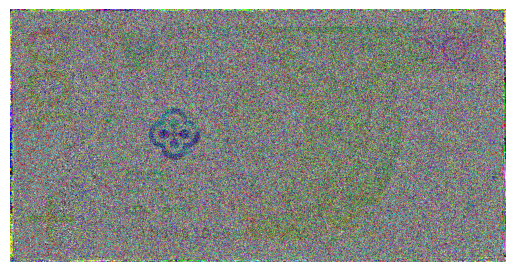

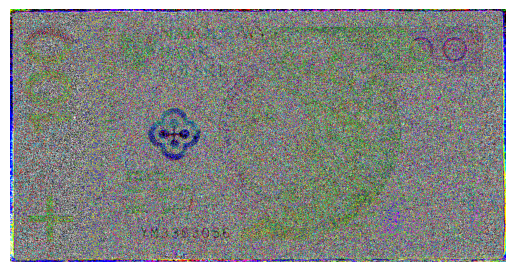

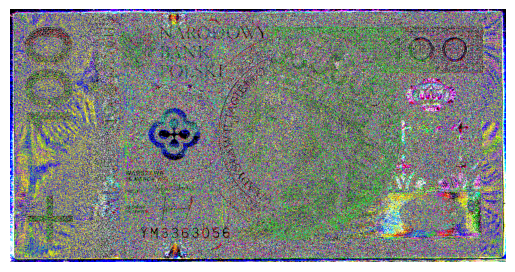

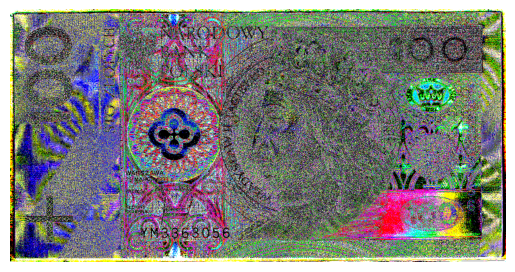

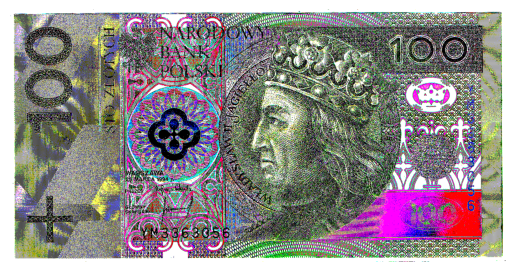

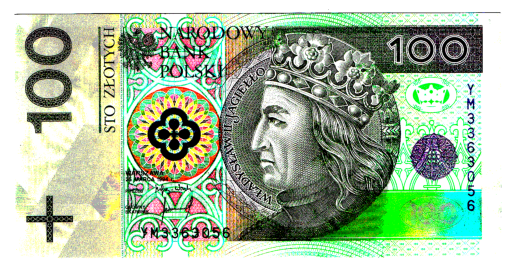

In [2]:
bit_planes = []
for i in range(8):
    bit_plane = (img >> i) & 1  
    bit_plane = bit_plane * 255  
    bit_planes.append(bit_plane)
    plt.imshow(bit_plane)
    plt.axis('off')
    plt.show()

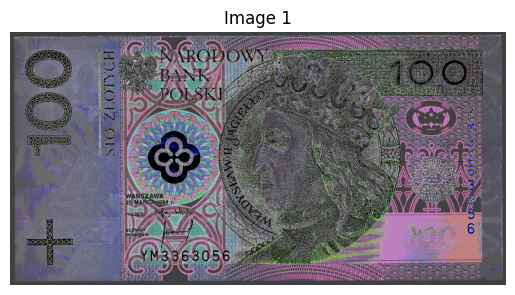

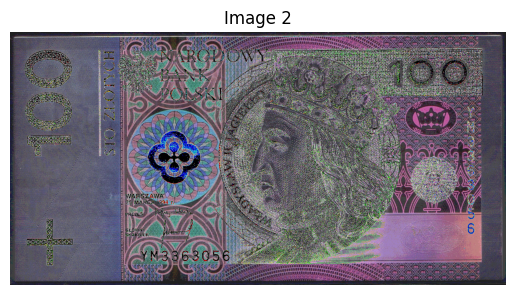

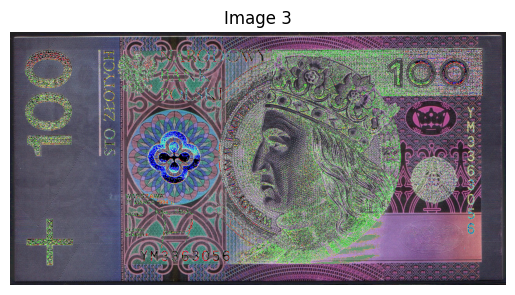

In [3]:
reconstructed_images = []

reconstructed_img1 = (bit_planes[7] << 7) + (bit_planes[6] << 6) 
reconstructed_images.append(reconstructed_img1)

reconstructed_img2 = (bit_planes[7] << 7) + (bit_planes[6] << 6) + (bit_planes[5] << 5) 
reconstructed_images.append(reconstructed_img2)

reconstructed_img3 = (bit_planes[7] << 7) + (bit_planes[6] << 6) + (bit_planes[5] << 5) + (bit_planes[4] << 4) 
reconstructed_images.append(reconstructed_img3)

for idx, reconstructed_img in enumerate(reconstructed_images):
    plt.imshow(reconstructed_img)
    plt.axis('off')
    plt.title(f'Image {idx + 1}')
    plt.show()
    